# Universidade Federal de Juiz de Fora
## Computação Evolucionista
### Trabalho 1: Problema de Roteamento de Veículo Elétrico
### Aluno: Matheus Muniz Damasco
### Professores: Heder Soares e Helio Jose Correa

## **1. Introdução**

Com a crescente preocupação ambiental e a necessidade de reduzir emissões de CO2, veículos elétricos (EVs) estão se tornando uma alternativa sustentável para empresas de logística como FedEx, UPS, DHL e TNT. O Problema de Roteamento de Veículos Elétricos (EVRP) surge nesse contexto, visando encontrar as melhores rotas para uma frota de EVs que respeitem as limitações de bateria e capacidade de carga, começando e terminando em um depósito central.

Este projeto de mestrado foca no desenvolvimento de um algoritmo genético para resolver o EVRP, combinando métodos de busca evolutiva e heurísticas. A pesquisa está alinhada com a competição CEC-12 do IEEE, que incentiva inovações nessa área. O objetivo é criar uma solução robusta que minimize a distância percorrida pelos EVs, atendendo todas as demandas dos clientes e respeitando as limitações energéticas dos veículos, utilizando benchmarks estabelecidos pela competição com foco especifico nas instâncias **'E-n23-k3.evrp'**  e **'E-n51-k5.evrp'**.

O foco deste trabalho é maximizar a otimização das rotas para EVs, explorando até onde podemos chegar usando algoritmos genéticos.



## **2. Modelos**

Primeiro, vamos começar pela nossa função principal do problema.

#### **Função para Calcular Distância Euclidiana (EUC_2D):**

**Distância** $= \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$

#### **Geração da Solução Inicial**

Achei importante dividirmos os clientes em 'C', depósito em 'D' e estações de recarga em 'E' para facilitar a organização e o cálculo das rotas.

Então nós começamos gerando uma solução inicial aleatória. Esta solução não é garantida como válida e serve como ponto de partida para a otimização.

Para gerar a solução inicial, realizamos os seguintes passos:

1. **Geração de Rota Aleatória:**  Criamos uma lista de identificadores de clientes e a embaralhamos. Usamos números aleatórios para dividir esta lista em várias sublistas, cada uma representando uma rota.

2. **Divisão em Rotas:** As sublistas são divididas em várias rotas, de acordo com o número máximo de veículos permitido.

#### **Verificação da Solução Inicial**

Após a geração da solução inicial, realizamos várias verificações para garantir a sua validade:

1. **Verificação de Visitas Repetidas:** Checamos se algum veículo visitou um cliente mais de uma vez.

2. **Número de Veículos:** Verificamos se o número de veículos utilizados na solução excede o número máximo permitido.

3. **Capacidade de Demanda:** Verificamos se a demanda total de qualquer rota excede a capacidade de carga do veículo.

4. **Capacidade de Energia:** Checamos se a energia total necessária para completar qualquer rota excede a capacidade de energia do veículo.

5. **Penalização:** Caso uma solução não respeite nossa validação ele inclui uma penalidade de 1000 a solução. Depois retornamos a distância total das rotas somadas à penalização (se houver).

#### **Comparação das Soluções**

1. **Cálculo do Comprimento das Rotas:** Nossa solução inclui métodos para calcular o comprimento total das rotas, somando as distâncias entre todos os nós visitados. Com isso, podemos comparar as soluções com base no comprimento total das rotas.

### **Greedy Search**

O objetivo do algoritmo de Greedy Search é encontrar rotas eficientes para os veículos elétricos, garantindo que todos os clientes sejam atendidos enquanto as restrições de capacidade e energia são respeitadas. O algoritmo insere estações de recarga ao longo das rotas para garantir que os veículos não fiquem sem energia.

Para atingir este objetivo, o algoritmo Greedy Search segue os seguintes passos:

#### **Configuração do Problema:**

1. **Cálculo das Distâncias:** Calcula a matriz de distâncias mais próximas entre os clientes e entre os clientes e as estações de recarga.

#### **Inicialização da Solução:**

1. **Clustering de Clientes:** Gera uma solução inicial utilizando clustering para agrupar clientes em rotas, garantindo que a capacidade dos veículos seja utilizada de maneira equilibrada.

#### **Otimização da Solução:**

1. **Inserção de Depósitos:** Durante a otimização, o algoritmo adiciona o depósito no início e no fim de cada rota. Se a demanda de um nó for maior que a capacidade do veículo, a função insere um depósito, simulando um retorno ao depósito para pegar um novo lote de mercadorias e continuar a rota.

2. **Inserção de Estações de Recarga:** Verifica se a energia do veículo é suficiente para alcançar o próximo nó. Se a energia não for suficiente, ele insere a estação de recarga mais próxima que permita ao veículo continuar a rota. Caso não exista nenhuma estação de recarga que satisfaça nossas restrições, o algoritmo volta para o nó anterior e encontra a estação mais próxima a partir do nó anterior.

3. **Substituição de Estações de Recarga:** Verifica se pode substituir uma estação de recarga existente por outra mais eficiente. Calcula o impacto da substituição de uma estação de recarga atual por uma nova, considerando a redução do comprimento total da rota e o consumo de energia.

4. **Otimização 2-Opt:** Utiliza a técnica 2-opt para otimizar localmente as rotas, buscando repetidamente um par de arestas que, se invertidas, resultariam em um caminho mais curto. Este processo é repetido até que nenhuma outra melhoria possa ser feita.

Com esses passos, o algoritmo de Greedy Search consegue gerar e otimizar rotas eficientes para os veículos elétricos, atendendo a todos os clientes e respeitando as restrições de capacidade e energia.

### **Algoritmo Genético**

O algoritmo genético (GA) desenvolvido para resolver o problema de roteamento de veículos elétricos (EVRP) é projetado para otimizar as rotas dos veículos enquanto respeita as restrições de capacidade e energia. O GA segue uma estrutura tradicional de algoritmos genéticos com algumas particularidades específicas para o EVRP.

#### **Configuração Inicial**

O algoritmo começa configurando os parâmetros básicos do GA, como o tamanho da população, número de gerações, probabilidades de crossover e mutação, e a taxa de elite. Esses parâmetros são cruciais para controlar a evolução das soluções ao longo das gerações.

1. **Inicialização da População:** A população inicial é gerada usando nosso greedy search, garantindo que cada solução inicial já seja uma rota viável para os veículos.

2. **Histórico de Fitness:** O algoritmo mantém um histórico do fitness médio e do melhor fitness encontrado a cada geração, permitindo acompanhar a evolução da qualidade das soluções.

#### **Parâmetro Alpha**

Foi introduzido um parâmetro Alpha para controle, variando de 1 a 0. Quando o Alpha está mais próximo de 1, geramos mais soluções novas e a mutação (HMM) tem maior chance de acontecer. Quando o Alpha está mais próximo de 0, geramos menos soluções novas, mas há uma maior probabilidade de aplicar a mutação (HSM) e a mutação por troca aleatória.


#### **Processo Evolutivo**
O processo evolutivo ocorre ao longo de várias gerações, onde cada geração passa pelas seguintes etapas:

1. **Seleção e Classificação:**
  * **Seleção por Rank:** As soluções na população são classificadas com base em sua aptidão (comprimento total das rotas). Tentando garantir que as soluções com melhor aptidão tenham uma maior probabilidade de serem escolhidas para reprodução.

  * **Elitismo:** O algoritmo seleciona uma porção das melhores soluções (elites) da população atual para garantir que as melhores soluções sejam preservadas e passadas para a próxima geração. Isso é feito do modo que ordenamos a população e retornamos as melhores soluções com base na taxa de elite configurada.

2. **Crossover:** O método que foi usado é uma heurística de distância, adequada para problemas de múltiplos veículos. O crossover inclui os seguintes passos:

  * Seleciona aleatoriamente um cliente.
  * As rotas dos pais são divididas em dois subconjuntos (sub1 e sub2) em torno do cliente selecionado.
  * Sub1 da rota do primeiro pai é combinado com Sub2 da rota do segundo pai para formar um filho e o Sub2 da rota do primeiro pai é combinado com Sub1 da rota do segundo pai para formar outro filho.
  * As novas rotas formadas (filhos) são reparadas para garantir que atendem às restrições do problema, como capacidade e energia.

Esses passos garantem a troca eficiente de cromossomos em subrotas próximas ao ponto inicial selecionado, minimizando a distância entre clientes e mantendo a diversidade genética nas soluções.

3. **Mutação:** As soluções resultantes do crossover podem ser submetidas a mutações, que introduzem pequenas alterações nas rotas para explorar novas possibilidades. As mutações incluem:

  *   **Mutação por Troca Aleatória:** Troca aleatoriamente a posição de dois clientes em uma rota.

  *   **Heuristic-Swap Mutation (HSM):** Escolhe um cliente aleatório $c_i$ e troca sua posição com o cliente $c_j$ de uma rota diferente que tenha a menor distância para o cliente $c_i$. Em resumo, troca dois clientes de rotas diferentes respeitando a menor distância entre eles.
  
  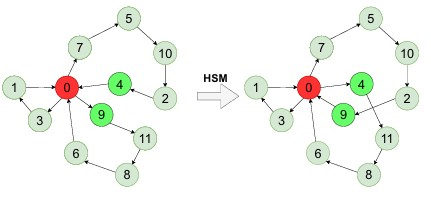

  *   **Heuristic-Move Mutation  (HMM):** Escolhe um cliente aleatório $c_i$ encontra o cliente $c_j$ de uma rota diferente que tenha a menor distância para o cliente $c_i$,e insere o cliente $c_j$ na rota contendo o cliente $c_i$. Em resumo, move um cliente de uma rota para outra sem substituição.

  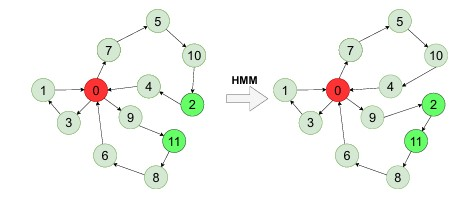

Esses operadores de mutação utilizam métodos heurísticos semelhantes ao operador de crossover, tendo efeitos significativos na redistribuição das rotas e correção de anomalias genéticas.

4. **Otimização Local:** Após as operações de crossover e mutação, as novas soluções passam por uma otimização local usando nosso greedy search para melhorar ainda mais a qualidade das rotas.

5. **Avaliação e Atualização da População:** A população é avaliada a cada geração, e as melhores soluções são mantidas enquanto novas soluções são introduzidas para garantir a diversidade.

6. **Histórico de Convergência:** O histórico de fitness é atualizado a cada geração, permitindo acompanhar as tendências de convergência do algoritmo.

Com esses passos, o algoritmo genético consegue evoluir e otimizar rotas eficientes para os veículos elétricos, atendendo a todos os clientes e respeitando as restrições de capacidade e energia.

### **Baseado no Algoritmo**

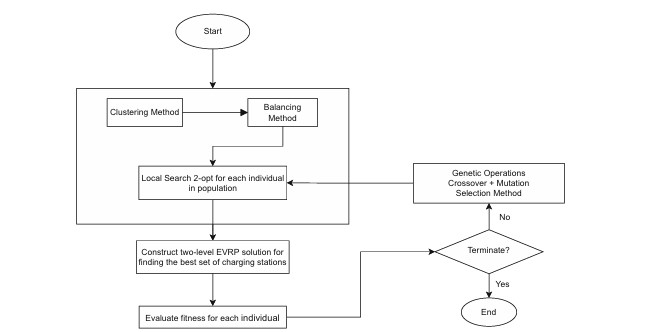

## **3. Resultados Alcançados e Comparação com os 3 primeiros colocados.**

### **Resultados Alcançados**

Parametros Usados:
* Números de indivíduos: 200
* Taxa de Crossover: 0.95 (95%)
* Taxa de Mutação: 0.1 (10%)
* Número de Gerações: 1000

1. Resultado 'E-n23-k3.evrp:
  * Valor Mínimo (Melhor valor): 611.299
  * Valor Médio: 835.935
  * Valor Máximo: 1374.338
  * Desvio Padrão: 197.126
  * Melhor Rota:
    * Rota 1: 0 -> 18 -> 21 -> 8 -> 25 -> 4 -> 5 -> 9 -> 7 -> 0
    * Rota 2: 0 -> 19 -> 20 -> 22 -> 30 -> 14 -> 17 -> 15 -> 16 -> 3 -> 2 -> 1 -> 6 -> 11 -> 12 -> 0
    * Rota 3: 0 -> 10 -> 13 -> 0
  
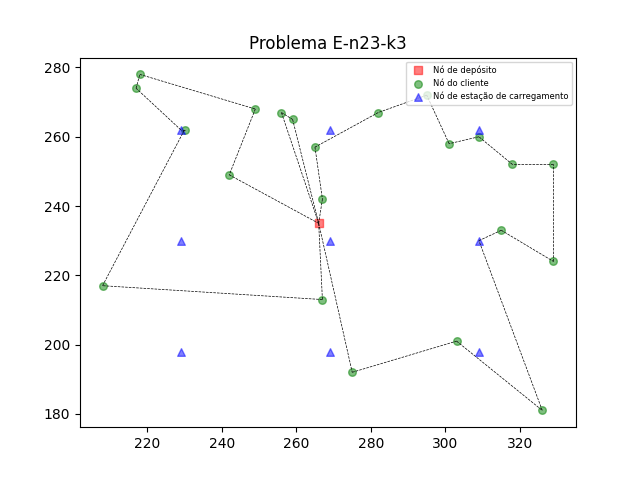


2. Resultado 'E-n51-k5.evrp':
  * Valor Mínimo (Melhor valor): 609.490
  * Valor Médio: 738.297
  * Valor Máximo: 1363.939
  * Desvio Padrão: 134.582
  * Melhor Rota:
    * Rota 1: 0 -> 33 -> 45 -> 39 -> 57 -> 10 -> 49 -> 30 -> 34 -> 50 -> 9 -> 5 -> 0
    * Rota 2: 0 -> 47 -> 18 -> 4 -> 17 -> 44 -> 15 -> 37 -> 12 -> 46 -> 0
    * Rota 3: 0 -> 42 -> 19 -> 51 -> 41 -> 40 -> 13 -> 25 -> 14 -> 6 -> 27 -> 0
    * Rota 4: 0 -> 24 -> 7 -> 43 -> 53 -> 23 -> 48 -> 26 -> 8 -> 31 -> 28 -> 22 -> 1 -> 32 -> 0
    * Rota 5: 0 -> 2 -> 3 -> 35 -> 36 -> 59 -> 20 -> 21 -> 29 -> 16 -> 38 -> 11 -> 0

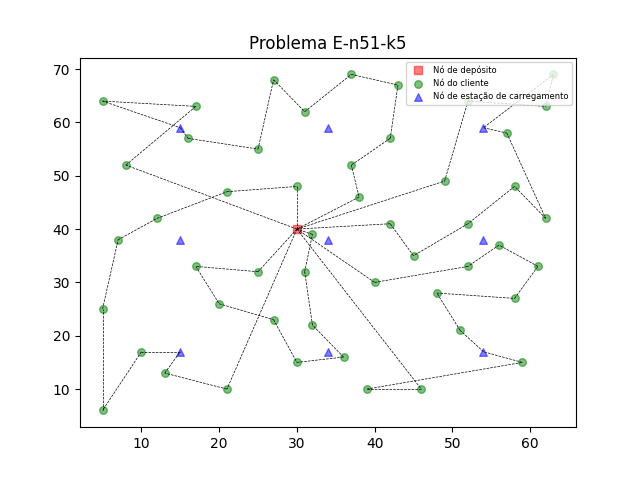

### **Resultados Alcançados Pelos 3 Primeiros Colocados**

Parametros Usados:
* Números de indivíduos: 200
* Taxa de Crossover: 0.95 (95%)
* Taxa de Mutação: 0.1 (10%)
* Número de Gerações: 25000n

1. Resultado 'E-n23-k3.evrp:

  * Time 1: Variable Neighbourhood Search by D. Woller, V. Vavra, V. Kozak, M. Kulich

  * Time 2: Simulated Annealing by V. Mak-Hau, B. Hill

  * Time 3: Genetic Algorithm by V. Q. Hien, T. C. Dao, T. B. Thang, H. T. T, Binh

    * Valor Mínimo (Melhor valor): 571.94
    * Valor Médio: 571.94
    * Valor Máximo: 571.94
    * Desvio Padrão: 0.0

2. Resultado 'E-n51-k5.evrp':
  * Time 1: Variable Neighbourhood Search by D. Woller, V. Vavra, V. Kozak, M. Kulich

    * Valor Mínimo (Melhor valor): 529.90
    * Valor Médio: 543.26
    * Valor Máximo: 548.98
    * Desvio Padrão: 3.52
  * Time 2: Simulated Annealing by V. Mak-Hau, B. Hill

    * Valor Mínimo (Melhor valor): 533.66
    * Valor Médio: 533.66
    * Valor Máximo: 533.66
    * Desvio Padrão: 0.00
  * Time 3: Genetic Algorithm by V. Q. Hien, T. C. Dao, T. B. Thang, H. T. T, Binh

    * Valor Mínimo (Melhor valor): 529.90
    * Valor Médio: 542.08
    * Valor Máximo: 553.23
    * Desvio Padrão: 8.57


  







## **4. Refêrencias**


#### [Power Point da Apresentação](https://docs.google.com/presentation/d/18KFfuEcnxh-Cyk8K-a2quAp-LiFLp7QfSXIZ6OQL0Xg/edit?usp=sharing)
#### [Artigo dos Ganhadores da Competição](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=nqnbN7QAAAAJ&citation_for_view=nqnbN7QAAAAJ:e5wmG9Sq2KIC)
#### [Código em C++ da Competição](https://mavrovouniotis.github.io/EVRPcompetition2020/SampleCode.zip)
#### [PrOgRaMaNdO - Algoritmos Genéticos](https://www.youtube.com/watch?v=jkXFbXxtWZ8&list=PLNa5V12lHXCx-B--e8BwlmS_8GH8WAXfW)
